In [136]:
%run preproc.ipynb
!jupyter kernelspec list
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sys
print('Python3 executable is ',sys.executable)
import matplotlib.pyplot  as plt

from sklearn.ensemble import BaggingClassifier

Available kernels:
  python3    /home/ssashita/anaconda3/share/jupyter/kernels/python3
Python3 executable is  /home/ssashita/anaconda3/envs/python3env/bin/python


### First load the data from a csv

In [137]:
data = pd.read_csv(filepath_or_buffer="githubadvisedata.csv",index_col="index",dtype={"buysell":np.str, "durationtype":np.str, "advisor":np.str,"otheradvices":np.str, "symbolname":np.str, "success":np.bool,"advisor":np.str, "niftysentiment":np.str})

### Next, create a dataframe from the contents. LabelEncode the symbolname and leadername fields since
### later scatter plot functions expect numerical values for x and y axes
### Also sort the dataframe first based on the ascending order of success fraction per leader, and secondly based 
### on the same per symbolname
### Create two scatter plots where you plot the success (True or False) in two different colors (yellow for True and 
### brown for False. In the first plot advisor is the x-axis and the position of the symbolname in the dataframe, sorted 
### as mentioned above, is the y-axis. In the second plot, symbolname is the y-axis and the position of the advisor
### in the dataframe, sorted as mentioned above, is the x-axis
### As you will notice, the first scatter plot is brown at the bottom and progressively turns more yellow towards the top
### Similarly, the second plot is more brown to the left and progressively turns more yellow towards the right

       symbolname  advisor  success  symbolname_successes  advisor_successes  \
index                                                                          
9304            0       62        1              0.000000           0.510638   
10445           0       62        0              0.000000           0.510638   
3581            2       29        1              0.000000           0.651685   
4870            2       24        1              0.000000           0.622093   
965             3      114        0              0.000000           0.444444   
2472            5       41        0              0.000000           0.438819   
6955           10       99        0              0.000000           0.270270   
7081           13      109        0              0.000000           0.258065   
1021           14        0        1              0.000000           0.458333   
1499           14        0        0              0.000000           0.458333   
5363           15       81        1     

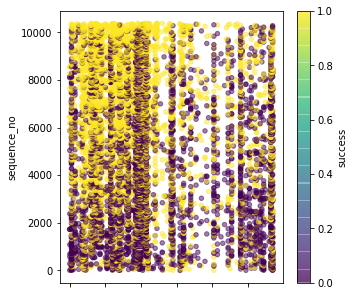

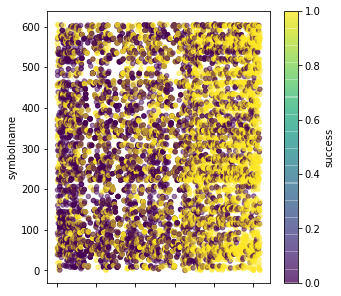

In [138]:
#plt.scatter(alpha=0.5)
tempdata = pd.DataFrame(data=data,copy=True)
symbol_encoder=LabelEncoder()
leader_encoder=LabelEncoder()

tempdata["symbolname"] = symbol_encoder.fit_transform(data["symbolname"])
tempdata["advisor"] = leader_encoder.fit_transform(data["advisor"])#pd.to_numeric(data["advisor"])
#tempdata.groupby("advisor").apply(lambda x: x[x=='True'].count())

#tempdata.groupby("advisor").agg({"success": (lambda x: x[x=='True'].count())})
def aggFunc(threshold):
    def func(x):
        c=x.count()
        if (c>=threshold):
            return x[x==True].count()
        else:
            return 0
    return func

leader_successes = (tempdata.groupby("advisor").agg({"success": aggFunc(10)}) /\
    tempdata.groupby("advisor").count()).sort_values(by="success",ascending=False)
leader_successes = leader_successes[["success"]]
symbolname_successes = (tempdata.groupby("symbolname").agg({"success": aggFunc(5)}) /\
    tempdata.groupby("symbolname").count()).sort_values(by="success",ascending=False)
symbolname_successes = symbolname_successes[["success"]]

tempdata['advisor_successes']=pd.Series(data=[leader_successes.loc[ll]["success"] for ll in tempdata['advisor']],index=tempdata.index)
tempdata["symbolname_successes"] = pd.Series(data=[symbolname_successes.loc[ss]["success"] for ss in tempdata['symbolname']],index=tempdata.index)

tempdata["success"] = LabelEncoder().fit_transform(data["success"])
tempdata = tempdata[["symbolname","advisor","success","symbolname_successes","advisor_successes","durationtype"]].sort_values(by=["symbolname_successes","symbolname"],ascending=True)

tempdata.assign(sequence_no=range(len(tempdata))).plot.scatter(alpha=0.5, c='success',colormap='viridis',y="sequence_no",x="advisor",figsize=(5,5))
print(tempdata.assign(sequence_no=range(len(tempdata))))

othertempdata = tempdata[["symbolname","advisor","success","symbolname_successes","advisor_successes","durationtype"]].sort_values(by=["advisor_successes","advisor"],ascending=True)
othertempdata.assign(sequence_no=range(len(othertempdata))).plot.scatter(alpha=0.5, c='success',colormap='viridis',y="symbolname",x="sequence_no",figsize=(5,5))
print(othertempdata.assign(sequence_no=range(len(othertempdata))))


### The following symbol advises have had large SUCCESS

In [139]:
tdata = tempdata[tempdata["symbolname_successes"]>0.8]
list(zip(symbol_encoder.classes_[tdata["symbolname"].values], tdata["symbolname_successes"].values, tdata["durationtype"].values))

[('GSKCONS', 0.8333333333333334, '3'),
 ('GSKCONS', 0.8333333333333334, '3'),
 ('GSKCONS', 0.8333333333333334, '3'),
 ('GSKCONS', 0.8333333333333334, '3'),
 ('GSKCONS', 0.8333333333333334, '3'),
 ('GSKCONS', 0.8333333333333334, '3'),
 ('HDFCAMC', 0.8571428571428571, '2'),
 ('HDFCAMC', 0.8571428571428571, '3'),
 ('HDFCAMC', 0.8571428571428571, '3'),
 ('HDFCAMC', 0.8571428571428571, '3'),
 ('HDFCAMC', 0.8571428571428571, '3'),
 ('HDFCAMC', 0.8571428571428571, '3'),
 ('HDFCAMC', 0.8571428571428571, '3'),
 ('TRENT', 0.8571428571428571, '2'),
 ('TRENT', 0.8571428571428571, '3'),
 ('TRENT', 0.8571428571428571, '3'),
 ('TRENT', 0.8571428571428571, '3'),
 ('TRENT', 0.8571428571428571, '3'),
 ('TRENT', 0.8571428571428571, '3'),
 ('TRENT', 0.8571428571428571, '3'),
 ('GUJGASLTD', 0.8666666666666667, '3'),
 ('GUJGASLTD', 0.8666666666666667, '3'),
 ('GUJGASLTD', 0.8666666666666667, '3'),
 ('GUJGASLTD', 0.8666666666666667, '3'),
 ('GUJGASLTD', 0.8666666666666667, '3'),
 ('GUJGASLTD', 0.866666666666

### The following leader advises have had large SUCCESS

In [140]:
tdata = othertempdata[othertempdata["advisor_successes"]>0.7]
list(zip(leader_encoder.classes_[tdata["advisor"].values], tdata["advisor_successes"].values, tdata["durationtype"].values))

[('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.7022900763358778, '3'),
 ('132', 0.702290076

### Try the VotingClassifier ensemble predictor

In [141]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

pipeline = FullPipeline()
tempdata = data.copy()
tempdata["success"] = pd.Series([str(x) for x in data["success"].values], index=tempdata.index)
non_num_attrs = ["advisor","durationtype","buysell","symbolname","niftysentiment"]

data_prepared = pipeline.full_pipeline_apply_features(tempdata,non_num_attrs)
label_prepared = pipeline.full_pipeline_apply_labels(tempdata,["success"]).ravel()
data_train, data_test,label_train,label_test = train_test_split(data_prepared,label_prepared,test_size=0.20)

#vote_classifier = VotingClassifier(estimators=[('rfclassifier', RandomForestClassifier(n_estimators=25, random_state=42,max_depth=60)), ('svc', SVC(C=1000,degree=4,gamma='scale',kernel='poly',coef0=0.1,decision_function_shape='ovo')), ('naive_bayes',MultinomialNB(alpha=1.12))],voting="hard")
vote_classifier = VotingClassifier(estimators=[('dtree1',DecisionTreeClassifier(random_state=312,max_depth=5,criterion="gini")),('dtree2',DecisionTreeClassifier(random_state=42,min_samples_split=350,criterion="gini")),('rfclassifier', RandomForestClassifier(n_estimators=1000, random_state=23,max_depth=10))], voting="soft")
vote_classifier.fit(data_train, label_train)

(5, 10380) 5 5
xx shape is (10380, 731)


VotingClassifier(estimators=[('dtree1', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_lea...tors=1000, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [142]:
vote_classifier.score(X=data_test, y=label_test)

0.6483622350674374

### Now lets try Bagging Classifiers

In [143]:
from sklearn.ensemble import BaggingClassifier

bg_classifier = BaggingClassifier(random_state=49,base_estimator=DecisionTreeClassifier(),n_estimators=200,bootstrap=True,max_features=720,max_samples=200)
bg_classifier.fit(data_train, label_train)
bg_classifier.score(data_test, label_test)

0.6445086705202312

### Pasting classifier

In [144]:
pst_classifier = BaggingClassifier(random_state=49,base_estimator=DecisionTreeClassifier(),n_estimators=299,bootstrap=False,max_features=720,max_samples=200)
pst_classifier.fit(data_train, label_train)
pst_classifier.score(data_test, label_test)

0.6473988439306358

### Ada Boost Classifier

In [145]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error

ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),learning_rate=0.70,n_estimators=120,random_state=49,algorithm="SAMME.R")
ada_classifier.fit(data_train, label_train)
print(ada_classifier.score(data_test, label_test))

ada_classifier.set_params(n_estimators=120)
errors = [mean_squared_error(label_test, y_pred) for y_pred in ada_classifier.staged_predict(data_test)]
bst_n_estimators = np.argmin(errors)
print('bst_n_estimators',bst_n_estimators)

ada_best = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),learning_rate=0.70,n_estimators=bst_n_estimators,random_state=49,algorithm="SAMME.R")
ada_best.fit(data_train,label_train)
ada_best.score(data_test,label_test)

0.6348747591522158
bst_n_estimators 16


0.6536608863198459

### Gradient Boost Classifier

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

grad_classifier = GradientBoostingClassifier(max_depth=4, learning_rate=0.70,n_estimators=120, random_state=42)
grad_classifier.fit(data_train,label_train)
errors = [mean_squared_error(label_test,y_pred) for y_pred in grad_classifier.staged_predict(data_test)]
bst_n_estimators = np.argmin(errors)
grad_best = GradientBoostingClassifier(max_depth=4, n_estimators=bst_n_estimators)
print('bst_n_estimators',bst_n_estimators)
grad_best.fit(data_train,label_train)
grad_best.score(data_test, label_test)

bst_n_estimators 24


0.6372832369942196

### A stacked generalization classifier. Use a RandomForest classifier at the end

In [147]:
svc_classifier=SVC(C=1900,degree=4,gamma='scale',kernel='poly',coef0=0.1,decision_function_shape='ovo',probability=True)
svc_classifier.fit(data_train, label_train)
print(svc_classifier.score(data_test, label_test))
svc_probas = svc_classifier.predict_proba(data_train)[:,1]

rnd_classifier=RandomForestClassifier(bootstrap=True,max_depth=4,n_estimators=1000,n_jobs=-1,random_state=42,oob_score=True)
rnd_classifier.fit(data_train,label_train)
rndf_probas=rnd_classifier.predict_proba(data_train)[:,1]

0.6628131021194605


0.717310405643739
0.6882771744175252


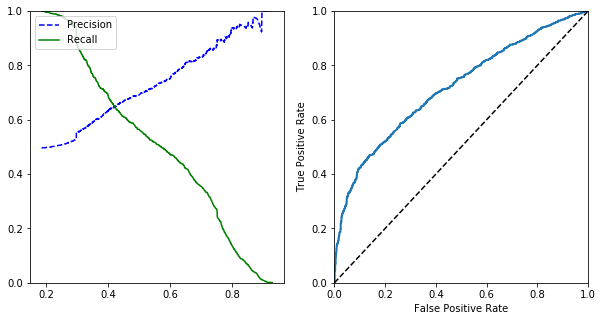

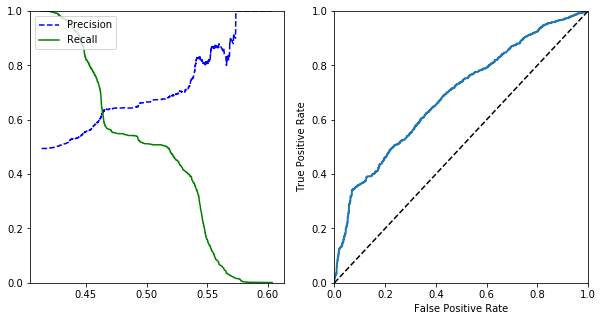

In [148]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve

svc_test_probas = svc_classifier.predict_proba(data_test)[:,1]
precisions,recalls, thresholds = precision_recall_curve(probas_pred=svc_test_probas, y_true=label_test)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)
print(roc_auc_score(y_score=svc_test_probas,y_true=label_test))
fpr,tpr,thresholds= roc_curve(y_score=svc_test_probas, y_true=label_test)
plt.subplot(1,2,2)
plot_roc_curve(fpr=fpr,tpr=tpr)

rndf_test_probas = rnd_classifier.predict_proba(data_test)[:,1]
precisions,recalls, thresholds = precision_recall_curve(probas_pred=rndf_test_probas, y_true=label_test)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)
print(roc_auc_score(y_score=rndf_test_probas,y_true=label_test))
fpr,tpr,thresholds= roc_curve(y_score=rndf_test_probas, y_true=label_test)
plt.subplot(1,2,2)
plot_roc_curve(fpr=fpr,tpr=tpr)

In [149]:
data_train.shape

(8304, 731)

In [150]:
svc_preds = svc_classifier.predict(data_train)
svc_test_preds = svc_classifier.predict(data_test)
rndf_preds = rnd_classifier.predict(data_train)
rndf_test_preds = rnd_classifier.predict(data_test)
data_train_stack = pd.DataFrame({"svc_preds": svc_preds, "rndf_preds":rndf_preds})
#data_train_stack,data_test_stack,label_train_stack,label_test_stack = train_test_split(data_stack,label_train,test_size=0.2)
data_test_stack = pd.DataFrame({"svc_preds":svc_test_preds, "rndf_preds":rndf_test_preds})

In [151]:
rnd_classifier=RandomForestClassifier(bootstrap=True,max_depth=4,n_estimators=1000,n_jobs=-1,random_state=42,oob_score=True)
rnd_classifier.fit(data_train_stack,label_train)
print(rnd_classifier.score(data_test_stack, label_test))
print(rnd_classifier.oob_score_)

0.6628131021194605
0.7690269749518305


### Results with stacking not quite satisfactory. Let's try Voting. I am desperate to somehow get a better 
### score than SVC (68.4)

In [152]:
vot_classifier = VotingClassifier(estimators=[("svc",svc_classifier),("rndf",rnd_classifier)],voting="soft")
vot_classifier.fit(data_train,label_train)
vot_classifier.score(data_test, label_test)


0.6632947976878613

### That was not too bad. Let us try a DecisionTreeClassifier for the stack classifier

0.6737974566044742
score 0.6628131021194605


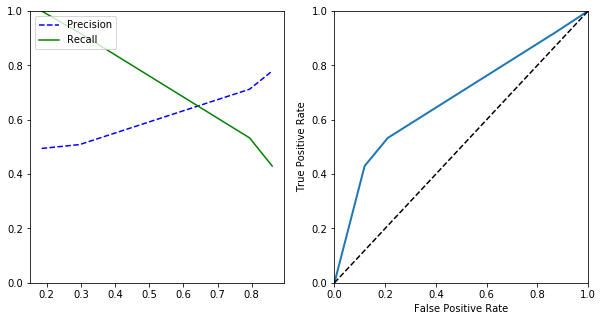

In [153]:

dt_classifier = DecisionTreeClassifier(max_depth=3,random_state=49)
dt_classifier.fit(data_train_stack,label_train)
stack_probas = dt_classifier.predict_proba(data_test_stack)[:,1]

precisions,recalls, thresholds = precision_recall_curve(probas_pred=stack_probas, y_true=label_test)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)
print(roc_auc_score(y_score=stack_probas,y_true=label_test))
fpr,tpr,thresholds= roc_curve(y_score=stack_probas, y_true=label_test)
plt.subplot(1,2,2)
plot_roc_curve(fpr=fpr,tpr=tpr)
print("score",dt_classifier.score(data_test_stack, label_test))

In [154]:
data_train.shape

(8304, 731)

### Let us avoid binarizing and see what happens when we use Ada boost - of course we can then use only Tree based classifiers

In [155]:
label_test

array([1, 1, 1, ..., 1, 0, 0])

In [156]:
pipel=Pipeline(steps=[('select',DataFrameSelector(non_num_attrs)),('encode',MyMultiLabelEncoder())])
data_prepared_encoded=pipel.fit_transform(tempdata)
data_train, data_test,label_train,label_test = train_test_split(data_prepared_encoded,label_prepared,test_size=0.20)


(5, 10380) 5 5
xx shape is (10380, 5)


In [157]:
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),learning_rate=0.7,n_estimators=120,random_state=49,algorithm="SAMME.R")
ada_classifier.fit(data_train,label_train)
errors =[mean_squared_error(label_test, y_pred) for y_pred in ada_classifier.staged_predict(data_test)]
bst_n_estimators = np.argmin(errors)
print('bst_n_estimators',bst_n_estimators)
ada_best = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),learning_rate=0.7,n_estimators=bst_n_estimators,random_state=49,algorithm="SAMME.R")
ada_best.fit(data_train,label_train)
print('score',ada_best.score(data_test, label_test))
sorted(zip(ada_best.feature_importances_,non_num_attrs),reverse=True)

bst_n_estimators 8
score 0.6445086705202312


[(0.48860758761100825, 'symbolname'),
 (0.265989874937726, 'advisor'),
 (0.14616001214573207, 'durationtype'),
 (0.06440637660212527, 'buysell'),
 (0.03483614870340842, 'niftysentiment')]

In [158]:
from sklearn.model_selection import GridSearchCV

dtree=DecisionTreeClassifier()
params_grid = [{"max_features":[1,2,3,4,5],"max_depth":[6,3,4,5],"random_state":[42]}]
grid_search=GridSearchCV(cv=5, estimator=dtree,param_grid=params_grid)
grid_search.fit(data_train, label_train)
grid_search.best_params_
#grid_search.best_score_
DecisionTreeClassifier(max_depth=5,max_features=5,random_state=42).fit(data_train, label_train).score(data_test,label_test)

0.6445086705202312

In [159]:
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,max_features=5,random_state=42),learning_rate=0.14,n_estimators=90,random_state=42,algorithm="SAMME.R")
ada_classifier.fit(data_train, label_train)
ada_classifier.score(data_test, label_test)

0.6425818882466281

In [160]:
from sklearn.naive_bayes import GaussianNB
mnb_classifier = GaussianNB(var_smoothing=8e-07)
mnb_classifier.fit(data_train.toarray(), label_train)
mnb_classifier.score(data_test.toarray(), label_test)
#mnb_classifier.get_params()

0.6223506743737958

### Lets try our luck with ExtraTreesClassifier

In [161]:
from sklearn.ensemble import ExtraTreesClassifier

In [162]:
ex_classifier = ExtraTreesClassifier(bootstrap=True,criterion='entropy',max_depth=4,random_state=49,n_estimators=1000,n_jobs=-1)
ex_classifier.fit(data_train,label_train)
ex_classifier.score(data_test,label_test)

0.6382466281310212

### Dimension Reduction. Let us start with PCA

### Restore data_train and data_test to original (binarized) version

In [163]:
data_train, data_test,label_train,label_test = train_test_split(data_prepared,label_prepared,test_size=0.20)
data_train.shape, data_test.shape

((8304, 731), (2076, 731))

In [108]:
from sklearn.decomposition import PCA


pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(data_train.toarray())
n_components = pca.n_components_
print(n_components,data_train.shape[1])
X_test_reduced = pca.transform(data_test.toarray())
svc_classifier=SVC(C=1900,degree=5,gamma='scale',kernel='poly',coef0=0.1,decision_function_shape='ovo')
svc_classifier.fit(X_reduced, label_train)
print(svc_classifier.score(X_test_reduced, label_test))



278 731
0.6632947976878613


## Use PCA to reduce dimensions then use RandForest with bagging, and max_features and max_depth and oob_score
## to get a good estimate of error

In [109]:
pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(data_train.toarray())
n_components = pca.n_components_
print(n_components)
X_test_reduced = pca.transform(data_test.toarray())


278


In [110]:
F=int(np.log2(n_components)+1)
rndf_classifier=RandomForestClassifier(bootstrap=True,n_estimators=1000,max_depth=10,max_features=F,n_jobs=-1,random_state=42,oob_score=True)
rndf_classifier.fit(X_reduced, label_train)
print(rndf_classifier.score(X_test_reduced, label_test))
rndf_classifier.oob_score_

0.6526974951830443


0.6576348747591522

In [111]:
rndf_classifier.oob_decision_function_

array([[0.64537875, 0.35462125],
       [0.72038663, 0.27961337],
       [0.53549663, 0.46450337],
       ...,
       [0.46514704, 0.53485296],
       [0.69859561, 0.30140439],
       [0.26148212, 0.73851788]])

In [112]:
len(label_train)

8304

### Now kernel PCA

In [113]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(gamma=0.04, kernel="rbf", n_components=200)
X_reduced=pca.fit_transform(data_train)
X_test_reduced = pca.transform(data_test.toarray())
rndf_classifier=RandomForestClassifier(bootstrap=True,max_depth=4,n_estimators=1000,n_jobs=-1,random_state=42,oob_score=True)
rndf_classifier.fit(X_reduced, label_train)
print(rndf_classifier.score(X_test_reduced, label_test))

0.6473988439306358


In [114]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(steps=[("kernel_pca",KernelPCA()),("dtree",DecisionTreeClassifier(max_depth=3, random_state=49))])
params_grid = [{"kernel_pca__n_components":[170,276,400],"kernel_pca__gamma":[0.03, 0.05,1.0],"kernel_pca__kernel":["rbf","sigmoid"]}]
grid_search = GridSearchCV(estimator=pipeline,cv=3,param_grid=params_grid)
grid_search.fit(data_train,label_train)
grid_search.best_params_

{'kernel_pca__gamma': 1.0,
 'kernel_pca__kernel': 'sigmoid',
 'kernel_pca__n_components': 170}

In [116]:
n_components=grid_search.best_params_["kernel_pca__n_components"]
n_components

170

In [119]:
from sklearn.model_selection import cross_val_score

pipeline = Pipeline(steps=[("kernel_pca",KernelPCA(gamma=1.0,kernel="sigmoid",n_components=n_components)),("dtree",DecisionTreeClassifier(max_depth=3, random_state=49))])
cross_val_score(estimator=pipeline,X=data_train,y=label_train,cv=3,n_jobs=-1)

array([0.65655471, 0.65498555, 0.63823636])

In [121]:
transformer = KernelPCA(gamma=1.0,kernel="sigmoid",n_components=n_components)
X_reduced = transformer.fit_transform(data_train)
X_test_reduced = transformer.transform(data_test)



In [122]:
F= int(np.log2(n_components)+1)
rndf_classifier=RandomForestClassifier(bootstrap=True,max_depth=4,max_features=F,n_estimators=1000,n_jobs=-1,random_state=42,oob_score=True)
rndf_classifier.fit(X_reduced, label_train)
print('score on test data',rndf_classifier.score(X_test_reduced, label_test))
print('oob_score',rndf_classifier.oob_score_)

score on test data 0.644990366088632
oob_score 0.6546242774566474


2076 (2076,)


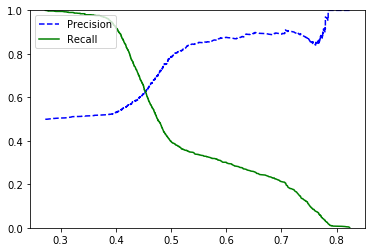

In [123]:
probas = rndf_classifier.predict_proba(X=X_test_reduced)[:,1]
print(len(probas),label_test.shape)

precisions,recalls,thresholds = precision_recall_curve(probas_pred=probas,y_true=label_test)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

## Use the Lasso classifier (you need to use LogisticRegression with the right parameters) and detect attributes
## that can be removed because the coefficients (theta) obtained are zero

In [124]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.pipeline import Pipeline


lasso_classifier=LogisticRegressionCV(Cs=[1.0],max_iter=100,cv=5,random_state=42,n_jobs=-1,penalty='l1',solver='saga')
lasso_classifier.fit(X_reduced, label_train)
print('score on test data',lasso_classifier.score(X_test_reduced, label_test))

score on test data 0.6286127167630058


In [125]:
 n_components = np.count_nonzero(lasso_classifier.coef_[0])
print(n_components)
X_reduced_after_lasso = X_reduced[:,lasso_classifier.coef_[0]!=0.0]
X_test_reduced_after_lasso = X_test_reduced[:,lasso_classifier.coef_[0]!=0.0]

68


In [126]:
lasso_classifier=LogisticRegressionCV(Cs=[1.0],max_iter=100,cv=5,random_state=42,n_jobs=-1,penalty='l1',solver='saga')
lasso_classifier.fit(X_reduced_after_lasso, label_train)
print('score on test data',lasso_classifier.score(X_test_reduced_after_lasso, label_test))

score on test data 0.6286127167630058


In [127]:
lasso_sgd_classifier = SGDClassifier(alpha=0.1,loss='log',penalty='l2', n_jobs=-1,random_state=42, max_iter=1000)
lasso_sgd_classifier.fit(X_reduced, label_train)
print('score on test data',lasso_sgd_classifier.score(X_test_reduced, label_test))

score on test data 0.6223506743737958


### Use the reduced attributes for Random Forest again

In [128]:
F= int(np.log2(127)+1)
rndf_classifier=RandomForestClassifier(bootstrap=True,max_depth=9,max_features=F,n_estimators=1000,n_jobs=-1,random_state=42,oob_score=True)
rndf_classifier.fit(X_reduced_after_lasso, label_train)
print('score on test data',rndf_classifier.score(X_test_reduced_after_lasso, label_test))
print('oob_score',rndf_classifier.oob_score_)

score on test data 0.6473988439306358
oob_score 0.6499277456647399


### Let us see how SVC does on this reduced data

In [129]:
svc_classifier=SVC(C=1900,degree=4,gamma='scale',kernel='poly',coef0=0.1,decision_function_shape='ovo',probability=True)
svc_classifier.fit(X_reduced_after_lasso, label_train)
print(svc_classifier.score(X_test_reduced_after_lasso, label_test))

0.6382466281310212


### And what about Ada boost on the reduced data

In [134]:
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),learning_rate=0.3,n_estimators=120,random_state=49,algorithm="SAMME.R")
ada_classifier.fit(X_reduced_after_lasso, label_train)
print(ada_classifier.score(X_test_reduced_after_lasso, label_test))

ada_classifier.set_params(n_estimators=120)
errors = [mean_squared_error(label_test, y_pred) for y_pred in ada_classifier.staged_predict(X_test_reduced_after_lasso)]
bst_n_estimators = np.argmin(errors)
print('bst_n_estimators',bst_n_estimators)



0.6570327552986512
bst_n_estimators 119


In [135]:
ada_best = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),learning_rate=0.3045,n_estimators=bst_n_estimators,random_state=49,algorithm="SAMME.R")
ada_best.fit(X_reduced_after_lasso,label_train)
ada_best.score(X_test_reduced_after_lasso,label_test)

0.6551059730250481

In [132]:
### Locally Linear Embedding

In [133]:
from sklearn.manifold import LocallyLinearEmbedding

pca = LocallyLinearEmbedding(n_components=277, n_neighbors=10)
X_reduced=pca.fit_transform(data_train.toarray())
X_test_reduced = pca.transform(data_test.toarray())
rndf_classifier=RandomForestClassifier(bootstrap=True,max_depth=4,n_estimators=1000,n_jobs=-1,random_state=42,oob_score=True)
rndf_classifier.fit(X_reduced, label_train)
print(rndf_classifier.score(X_test_reduced, label_test))

0.6319845857418112


In [522]:
### 